In [60]:
import pandas as pd
import numpy as np

In [61]:
data_tracks = pd.read_csv("/Users/pacaicedo/DatasetsVault/spotify/tracks.csv")

# Preprocesamiento

La estructura general del preprocesamiento es:

1. Revisar estructura digital del dataset
2. El tipo de información de cada variable (Dataseries)
3. Plantear reglas para la definción de valores atípicos

In [62]:
data_tracks.shape

(586671, 20)

In [63]:
type(data_tracks)

pandas.core.frame.DataFrame

In [64]:
type(data_tracks.explicit)

pandas.core.series.Series

In [65]:
data_tracks.info

<bound method DataFrame.info of                             id                                 name  \
0       35iwgR4jXetI318WEWsa1Q                                Carve   
1       021ht4sdgPcrDgSk7JTbKY  Capítulo 2.16 - Banquero Anarquista   
2       07A5yehtSnoedViJAZkNnc   Vivo para Quererte - Remasterizado   
3       08FmqUhxtyLTn6pAh6bk45        El Prisionero - Remasterizado   
4       08y9GfoqCWfOGsKdwojr5e                  Lady of the Evening   
...                        ...                                  ...   
586666  5rgu12WBIHQtvej2MdHSH0                                  云与海   
586667  0NuWgxEp51CutD2pJoF4OM                                blind   
586668  27Y1N4Q4U3EfDU5Ubw8ws2            What They'll Say About Us   
586669  45XJsGpFTyzbzeWK8VzR8S                      A Day At A Time   
586670  5Ocn6dZ3BJFPWh4ylwFXtn                     Mar de Emociones   

        popularity  duration_ms  explicit                          artists  \
0                6       126903      

In [66]:
data_tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586671 entries, 0 to 586670
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586671 non-null  object 
 1   name              586600 non-null  object 
 2   popularity        586671 non-null  int64  
 3   duration_ms       586671 non-null  int64  
 4   explicit          586671 non-null  int64  
 5   artists           586671 non-null  object 
 6   id_artists        586671 non-null  object 
 7   release_date      586671 non-null  object 
 8   danceability      586671 non-null  float64
 9   energy            586671 non-null  float64
 10  key               586671 non-null  int64  
 11  loudness          586671 non-null  float64
 12  mode              586671 non-null  int64  
 13  speechiness       586671 non-null  float64
 14  acousticness      586671 non-null  float64
 15  instrumentalness  586671 non-null  float64
 16  liveness          58

In [67]:
type(data_tracks["duration_ms"])

pandas.core.series.Series

In [68]:
data_tracks[["valence", "tempo"]]

,valence,tempo
0,0.1270,104.851
1,0.6550,102.009
2,0.4570,130.418
3,0.3970,169.980
4,0.1960,103.220
...,...,...
586666,0.2110,131.896
586667,0.6860,150.091
586668,0.0663,145.095
586669,0.4380,90.029


In [69]:
data_tracks.loc[:,"valence"]

0         0.1270
1         0.6550
2         0.4570
3         0.3970
4         0.1960
           ...  
586666    0.2110
586667    0.6860
586668    0.0663
586669    0.4380
586670    0.9750
Name: valence, Length: 586671, dtype: float64

In [70]:
data_tracks.iloc[:, 4]

0         0
1         0
2         0
3         0
4         0
         ..
586666    0
586667    0
586668    0
586669    0
586670    0
Name: explicit, Length: 586671, dtype: int64

In [71]:
data_tracks.iloc[:, 2:4]

,popularity,duration_ms
0,6,126903
1,0,98200
2,0,181640
3,0,176907
4,0,163080
...,...,...
586666,50,258267
586667,72,153293
586668,70,187601
586669,58,142003


In [72]:
data_tracks.isna().sum()

id                   0
name                71
popularity           0
duration_ms          0
explicit             0
artists              0
id_artists           0
release_date         0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       0
dtype: int64

In [73]:
data_tracks[data_tracks["name"].isna()]

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
226335,4iH7negBYMfj2z0wDNmgdx,NaN,28,264973,0,[''],['0LyfQWJT6nXafLPZqxe9Of'],1994-01-01,0.512,0.578,0,-12.280,0,0.0299,0.0433,0.000064,0.5160,0.692,156.465,1
510974,04d5kbLvSAIBt3pGcljdhC,NaN,0,184293,0,[''],['0LyfQWJT6nXafLPZqxe9Of'],1922-04-01,0.426,0.285,11,-11.970,1,0.0466,0.9950,0.264000,0.2930,0.583,135.661,4
510975,05tRkgyxVdwMePGqOXMDYU,NaN,0,191587,0,[''],['0LyfQWJT6nXafLPZqxe9Of'],1922-04-01,0.344,0.186,0,-13.495,1,0.0745,0.9950,0.000000,0.1150,0.290,79.591,1
510977,0YAMRgAQH6tkTh4sWNXr8L,NaN,0,191573,0,[''],['0LyfQWJT6nXafLPZqxe9Of'],1922-04-01,0.316,0.257,3,-13.611,0,0.0549,0.9950,0.769000,0.5190,0.529,68.682,3
510978,1K6MQQxmFpPb66ZnaiIpHX,NaN,0,167602,0,[''],['0LyfQWJT6nXafLPZqxe9Of'],1922-04-01,0.558,0.283,1,-12.847,1,0.0646,0.9960,0.000000,0.4530,0.608,70.379,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517205,6OH9mz9aFbGlbf74cBwYWD,NaN,2,209760,0,[''],['0LyfQWJT6nXafLPZqxe9Of'],1962-02-01,0.506,0.598,7,-4.672,0,0.0635,0.7710,0.000001,0.6910,0.800,91.172,4
517214,15RqFDA86slfzujSQMEX4i,NaN,2,257280,0,[''],['0LyfQWJT6nXafLPZqxe9Of'],1962-02-01,0.612,0.615,5,-5.609,1,0.0551,0.8540,0.000023,0.0541,0.809,90.536,4
520126,0hKA9A2JPtFdg0fiMhyjQD,NaN,6,194081,0,[''],['0LyfQWJT6nXafLPZqxe9Of'],1974-12-31,0.471,0.369,4,-12.927,0,0.1460,0.9680,0.001100,0.1410,0.766,94.063,4
525237,1kR4gIb7nGxHPI3D2ifs59,NaN,26,289440,0,[''],['0LyfQWJT6nXafLPZqxe9Of'],1998-01-05,0.501,0.583,7,-9.460,0,0.0605,0.6900,0.003960,0.0747,0.734,138.391,4


In [74]:
data_tracks.sort_values("duration_ms")

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
1440,2s6e7KLoQ5hie3Cnh73v2v,Pause Track,0,3344,0,['Louis Armstrong'],['19eLuQmk9aCobbVDHc6eek'],1925,0.000,0.000000,0,-60.000,0,0.0000,0.00000,0.00000,0.000,0.000,0.000,0
1569,4SjlyAejCNUB4MrGM1KuVp,Pause Track,0,3344,0,['Louis Armstrong'],['19eLuQmk9aCobbVDHc6eek'],1925,0.000,0.000000,0,-60.000,0,0.0000,0.00000,0.00000,0.000,0.000,0.000,0
1619,52qf3kN9pExTlHdSlh3ZeR,Pause Track,0,3344,0,['Louis Armstrong'],['19eLuQmk9aCobbVDHc6eek'],1925,0.000,0.000000,0,-60.000,0,0.0000,0.00000,0.00000,0.000,0.000,0.000,0
1574,4WeyR22Ax2fF9dY0NxgjFV,Pause Track,0,3344,0,['Louis Armstrong'],['19eLuQmk9aCobbVDHc6eek'],1925,0.000,0.000000,0,-60.000,0,0.0000,0.00000,0.00000,0.000,0.000,0.000,0
1823,7bgYtpP5qxWabDHsPY8Rwc,Pause Track,0,4000,0,['Louis Armstrong'],['19eLuQmk9aCobbVDHc6eek'],1925,0.000,0.000000,0,-60.000,0,0.0000,0.00000,0.00000,0.000,0.000,0.000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399470,7r86YmJo79FRcAHuVeKZp8,Tech House The Yearbook 2018 - Continuous Mix 2,0,4864333,0,['Monoteque'],['1w3ov1Em1iYnTpAh3pIbOf'],2018-12-16,0.691,0.639000,1,-10.181,1,0.0486,0.00424,0.72100,0.116,0.157,124.545,4
586456,7jTxNjSwPcPjSbK8829Vno,Surah Al-Araf,39,4995083,0,['Sheikh Mishary Rashid Alfasay'],['6nd2oiKSu9ksEAMzpXjIyi'],2010-01-01,0.426,0.249000,11,-7.202,1,0.0301,0.91000,0.00000,0.143,0.400,134.168,3
131875,6rGikpwOv3LXaHWVCYbMNC,New Year's Eve 2015 Party Hits - Full DJ Party...,0,5042185,0,['Various Artists'],['0LyfQWJT6nXafLPZqxe9Of'],2014-12-19,0.457,0.891000,11,-4.596,0,0.0627,0.00467,0.00109,0.294,0.731,129.516,4
450240,7foc25ig7dibxvULPU2kBG,Brown Noise - 90 Minutes,50,5403500,0,['Sound Dreamer'],['4YJlpG8fCq38GnS8ElByiF'],2013-06-05,0.000,0.000099,2,-21.669,1,0.0000,0.11100,0.39200,0.137,0.000,0.000,0


In [75]:
data_tracks[data_tracks["duration_ms"]>30000].sort_values("duration_ms")

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
89532,6wlvYZ2THeKzH2i2oQnfL7,Little Something (Mix Cut) - Super8 & Tab Remix,9,30013,0,"['Above & Beyond', 'Justine Suissa', 'Super8 &...","['10gzBoINW3cLJfZUka8Zoe', '6UKSvQC8EQZUOKtUaj...",2016-12-16,0.499,0.936000,6,-6.517,1,0.0981,0.000025,0.00510,0.315,0.385,128.059,4
381422,4QI85wXOWi6YjuIPzqW0Nw,Little Something - Super8 & Tab Remix Mix Cut,2,30013,0,"['Above & Beyond', 'Tranquility Base', 'Justin...","['10gzBoINW3cLJfZUka8Zoe', '4u2OHlzl2kRnU2FSUr...",2016-12-16,0.499,0.936000,6,-6.517,1,0.0981,0.000025,0.00510,0.315,0.385,128.059,4
304616,5PdhyqtTUvJHf1elMXqntI,Pegasus (Mix Cut) - Original Mix,4,30016,0,['Protoculture'],['37kQjANSQM1tmkTwvB5M96'],2015-12-18,0.404,0.961000,10,-7.525,0,0.0425,0.000088,0.91500,0.380,0.611,127.989,4
131735,4PmeQ00dZe1nwyD4OudK37,New Years Eve Ultimate Countdown 2014 Male Voi...,0,30023,0,['DJ X-Change'],['6ZFdIGUXMQXUTqeYqbwxFV'],2013-12-10,0.564,0.397000,10,-12.585,1,0.5450,0.839000,0.00000,0.317,0.351,61.105,4
131739,3HsHEL0y7NmcScTp31b6EZ,New Years Eve Ultimate Countdown 2014 Female V...,0,30023,0,['DJ X-Change'],['6ZFdIGUXMQXUTqeYqbwxFV'],2013-12-10,0.635,0.317000,7,-10.353,0,0.4120,0.750000,0.00000,0.303,0.611,107.913,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399470,7r86YmJo79FRcAHuVeKZp8,Tech House The Yearbook 2018 - Continuous Mix 2,0,4864333,0,['Monoteque'],['1w3ov1Em1iYnTpAh3pIbOf'],2018-12-16,0.691,0.639000,1,-10.181,1,0.0486,0.004240,0.72100,0.116,0.157,124.545,4
586456,7jTxNjSwPcPjSbK8829Vno,Surah Al-Araf,39,4995083,0,['Sheikh Mishary Rashid Alfasay'],['6nd2oiKSu9ksEAMzpXjIyi'],2010-01-01,0.426,0.249000,11,-7.202,1,0.0301,0.910000,0.00000,0.143,0.400,134.168,3
131875,6rGikpwOv3LXaHWVCYbMNC,New Year's Eve 2015 Party Hits - Full DJ Party...,0,5042185,0,['Various Artists'],['0LyfQWJT6nXafLPZqxe9Of'],2014-12-19,0.457,0.891000,11,-4.596,0,0.0627,0.004670,0.00109,0.294,0.731,129.516,4
450240,7foc25ig7dibxvULPU2kBG,Brown Noise - 90 Minutes,50,5403500,0,['Sound Dreamer'],['4YJlpG8fCq38GnS8ElByiF'],2013-06-05,0.000,0.000099,2,-21.669,1,0.0000,0.111000,0.39200,0.137,0.000,0.000,0


In [76]:
data_tracks1 = data_tracks.copy()

In [77]:
data_tracks.dropna(inplace=True)

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

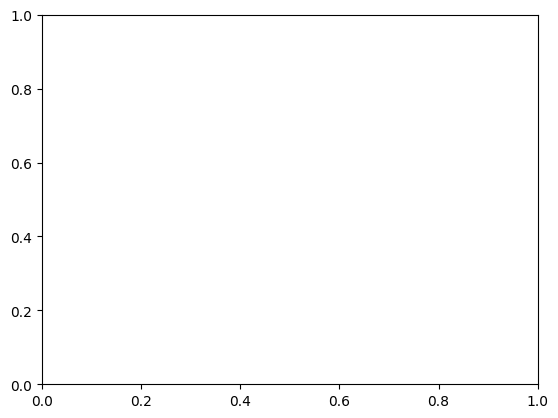

In [83]:
# Crear el lienzo donde se va a dibujar
fig, ax = plt.subplots()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


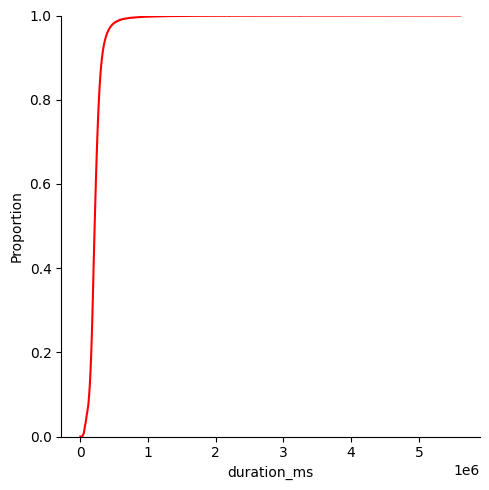

In [88]:
# Selección de gráfica según el objetivo
sns.displot(data=data_tracks, x="duration_ms", color="r", kind="ecdf")

<Axes: xlabel='duration_ms'>

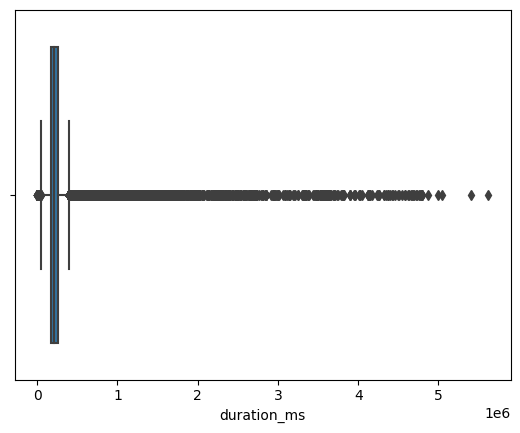

In [90]:
sns.boxplot(data=data_tracks, x="duration_ms")
